In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import sys
sys.path.append('../')

from intersections_and_roads import *
from shapely.geometry import *
import ast
from search import *
import pickle

In [2]:
with open('san_fran_4_points_centroid_and_k_points', 'rb') as f:
    vals = pickle.load(f)
with open('san_fran_intersection_graph', 'rb') as f:
    intersection_graph = pickle.load(f)
with open('san_fran_connection_dic', 'rb') as f:
    connection_dict = pickle.load(f)

In [5]:
[p1,p2,p3,p4,best_centroid, best_centroid, k_points] = vals
starting_points = [p1,p2,p3,p4]

In [ ]:
best_centroid, best_cost, k_points = k_beam_search(10, intersection_graph, connection_dict, get_road_cost, euclidean_heuristic, starting_points=starting_points)

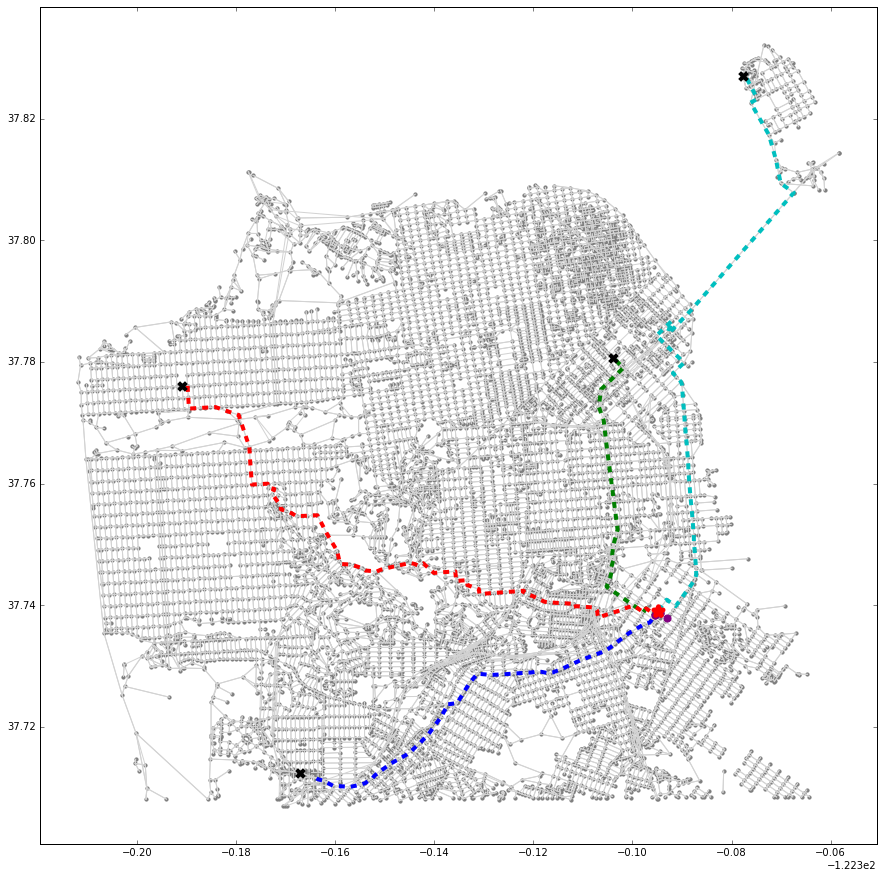

In [6]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))
routes, connections = get_routes_to_centroid(best_centroid, starting_points, intersection_graph, connection_dict)
plot_local_search_graph(best_centroid, starting_points, k_points, intersection_graph, connection_dict, routes, ax=ax)

In [8]:
centroid = simulated_annealing_b(intersection_graph,
                                 connection_dict,
                                 get_road_cost,
                                 null_heuristic,
                                 starting_points=[p1,p2,p3, p4])

TypeError: get_routes_to_centroid() takes exactly 5 arguments (4 given)

In [9]:
routes, connections = get_routes_to_centroid(centroid, starting_points, k_points, intersection_graph, connection_dict)

In [ ]:
plot_local_search_graph(centroid, starting_points, [], intersection_graph, connection_dict, routes)